#### **Project Title:**  ***"Data Preprocessing, Model Building and Prediction Analysis"***
##### **Dataset:** *"Bank Marketing Dataset"*
##### **Step 01:** Loading Important Libraries

In [1]:
#For data manipulation and analysis.
import pandas as pd
#For numerical operations and array handling.
import numpy as np
#For creating static visualizations.
import matplotlib.pyplot as plt
#For statistical data visualization based on matplotlib.
import seaborn as sns
#LabelEncoder to convert categorical variables into numeric format.
#StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import LabelEncoder, StandardScaler
#mutual_info_classif is used to compute the mutual information between each feature and the target variable.
#SelectKBest is used to select the top 'k' features based on their performance score (mutual information in this case).
from sklearn.feature_selection import mutual_info_classif , SelectKBest
#scikit-learn import for splitting data.
from sklearn.model_selection import train_test_split
#Importing LogisticRegression from sklearn.linear_model for training a logistic regression model.
from sklearn.linear_model import LogisticRegression
#Importing DecisionTreeClassifier from sklearn.tree for training a decision tree model.
from sklearn.tree import DecisionTreeClassifier
#Importing RandomForestClassifier from sklearn.ensemble for training a random forest model.
from sklearn.ensemble import RandomForestClassifier
#Importing cross_val_score from sklearn.model_selection to perform cross-validation for model evaluation.
from sklearn.model_selection import cross_val_score
#Importing accuracy_score, confusion_matrix and classification_report from sklearn.metrics to evaluate model performance.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### **Step 02:** Loading Dataset

In [2]:
#Loading the Bank Marketing Dataset.
bank_data = pd.read_csv("bank_marketing_dataset.csv")

##### **Step 03:** Exploring the Dataset

In [3]:
#Exploring the Bank Marketing Dataset.
print("-----------Bank Marketing Dataset Exploration-----------")
print("First five rows of Bank Marketing Dataset:\n",bank_data.head())
print("Last five rows of Bank Marketing Dataset:\n",bank_data.tail())
#Displaying the shape of the dataset(rows, columns).
print("Bank Marketing Dataset Shape: \n",bank_data.shape)
#Displaying the column names in the dataset.
print("Bank Marketing Dataset Coloumns: \n",bank_data.columns)
#Displaying the data types of each column.
print("Bank Marketing Dataset Datatypes: \n",bank_data.dtypes)
#Displaying the count of missing values in each column.
print("Bank Marketing Dataset Missing Values: \n",bank_data.isnull().sum())

-----------Bank Marketing Dataset Exploration-----------
First five rows of Bank Marketing Dataset:
    age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes 

##### **Step 04:** Generating Summary Statistics of the Dataset

In [4]:
#Extracting summary statistical analysis of Bank Marketing Dataset.
print("Summary Statistics of Bank Marketing Dataset:\n",bank_data.describe())

Summary Statistics of Bank Marketing Dataset:
                 age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      

##### **Brief Summary of Dataset**
**Bank Marketing Dataset:**  
This dataset comprises records from Portuguese bank marketing campaigns aimed at promoting term deposits. It includes customer **demographics**, **financial information** and **campaign engagement history**.

**Key Features:**
- **Demographics:** `age`, `job`, `marital`, `education`
- **Financial Details:** `default` (credit status), `balance` (average yearly balance), `housing` (housing loan status), `loan` (personal loan status)
- **Campaign Contact Details:** `contact` (communication type), `day`, `month`
- **Campaign Metrics:** `duration` (last contact duration), `campaign` (number of contacts during the campaign), `pdays` (days since prior contact), `previous` (previous contacts count)
- **Outcome Indicators:** `poutcome` (outcome of previous campaign), `deposit` (target variable indicating term deposit subscription)


##### ***Predicting Bank Marketing Campaign Success (Binary Classification)***
##### **Step 05:** Data Preprocessing

In [5]:
#Handling missing values in Bank Marketing Dataset.
#Replacing missing values in all columns (categorical and numerical) with the mode of the respective column.
bank_data.fillna(bank_data.mode().iloc[0],inplace=True)
print("Missing values in Bank Marketing Dataset handled successfully!")

Missing values in Bank Marketing Dataset handled successfully!


In [6]:
#Encoding Categorial Variables in Bank Marketing Dataset.
#Initializing LabelEncoder.
label_encoder = LabelEncoder()
#Encoding all categorical columns in Bank Marketing Dataset with the help of for loop.
categorical_columns = bank_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])
print("Categorical variables in Bank Marketing Dataset encoded successfully!")

Categorical variables in Bank Marketing Dataset encoded successfully!


In [7]:
#Standardizing the Bank Marketing Dataset.
#Initializing the StandardScaler.
scaler = StandardScaler()
#Standardizing all numerical columns in Bank Marketing Dataset.
numerical_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns
bank_data[numerical_columns] = scaler.fit_transform(bank_data[numerical_columns])
print("Bank Marketing Dataset standardized successfully!")

Bank Marketing Dataset standardized successfully!


##### **Step 06:**  Feature Selection

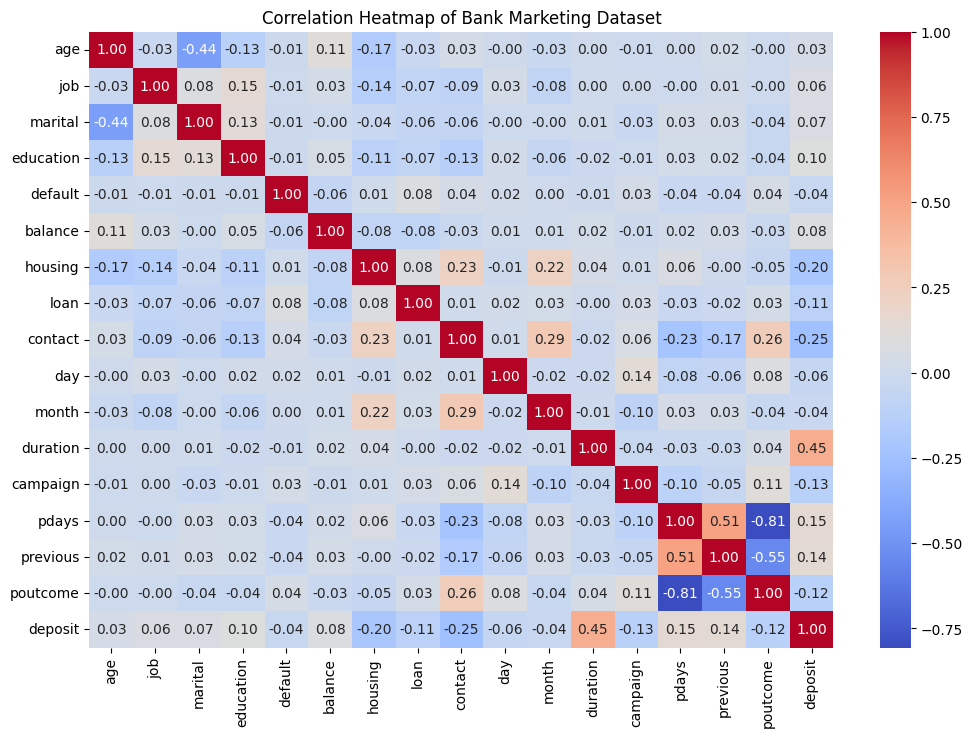

Strongly correlated features in Bank Marketing Dataset:
 deposit      1.000000
duration     0.451919
contact      0.249847
housing      0.203888
pdays        0.151593
previous     0.139867
campaign     0.128081
poutcome     0.122369
loan         0.110580
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
day          0.056326
default      0.040680
month        0.037121
age          0.034901
Name: deposit, dtype: float64


In [8]:
#Computing correlation analysis of Bank Marketing Dataset. 
#Calculateing the pairwise correlation between numerical features
correlation_matrix = bank_data.corr()  
#Plotting a heatmap to visualize correlations.
#Setting the figure size for better readability.
plt.figure(figsize=(12, 8))  
#Creating a heatmap with annotations and color mapping.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#Adding a title to the heatmap.
plt.title("Correlation Heatmap of Bank Marketing Dataset")  
#Displaying the heatmap.
plt.show()  
#Identifying features with strong correlation to the target variable('deposit').
strong_corr_features = correlation_matrix['deposit'].abs().sort_values(ascending=False)  
#Extracting correlations with the target variable, take absolute values and sort in descending order.
print("Strongly correlated features in Bank Marketing Dataset:\n", strong_corr_features)  

In [9]:
#Fixing the 'deposit' column in Bank Marketing Dataset. 
bank_data['deposit'] = bank_data['deposit'].apply(lambda x: 1 if x > 0 else 0)
#One-hot encode categorical features.
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    bank_data[col] = bank_data[col].astype('category')
#Selecting all columns except 'deposit' as features in Bank Marketing Dataset. 
X = bank_data.drop(columns=['deposit'])
#Setting the 'deposit' column as the target variable in Bank Marketing Dataset.
y = bank_data['deposit']
#One-hot encode categorical features, dropping the first category to avoid multicollinearity.
X = pd.get_dummies(X, drop_first=True)
#Validating the Bank Marketing Dataset. 
print("Feature set shape:", X.shape)
print("Target shape:", y.shape)
if X.empty or y.empty:
    raise ValueError("Dataset is empty after preprocessing. Check your data!")
#Computing mutual information scores.
mutual_info = mutual_info_classif(X, y)
#Displaying ranked features in Bank Marketing Dataset.
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
print("Features ranked by mutual information in Bank Marketing Dataset:\n", mutual_info_df)

Feature set shape: (11162, 42)
Target shape: (11162,)
Features ranked by mutual information in Bank Marketing Dataset:
                            Feature  Mutual Information
3                         duration            0.156400
40   poutcome_-0.47639688057124274            0.046950
1                          balance            0.045257
5                            pdays            0.041467
27      contact_1.8447863000624307            0.033487
41     poutcome_0.5207045596943137            0.027652
6                         previous            0.026966
0                              age            0.025403
24      housing_1.0552795106857558            0.022668
2                              day            0.014914
4                         campaign            0.012984
35         month_0.800267606336206            0.012719
37        month_1.4268739703307858            0.010171
38        month_1.7401771523280758            0.009794
34        month_0.4869644243389161            0.008955


In [10]:
#Using SelectKBest with mutual information to select top 5 features in Bank Marketing Dataset.
selector = SelectKBest(score_func=mutual_info_classif, k=5) 
#Fitting the selector to the data and transform X to select the top 5 features based on mutual information.
X_selected = selector.fit_transform(X, y) 
#Displaying the selected features in Bank Marketing Dataset.
selected_features = X.columns[selector.get_support()] 
print("Top 5 features selected by SelectKBest in Bank Marketing Dataset:\n", selected_features) 

Top 5 features selected by SelectKBest in Bank Marketing Dataset:
 Index(['balance', 'duration', 'pdays', 'contact_1.8447863000624307',
       'poutcome_-0.47639688057124274'],
      dtype='object')


##### **Step 07:**   Model Training

In [11]:
#Splitting the data into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#Initializing the Logistic Regression model, Decision Tree model and Random Forest model.
logreg_model = LogisticRegression(random_state=42) 
dt_model = DecisionTreeClassifier(random_state=42)  
rf_model = RandomForestClassifier(random_state=42)  
#Training and evaluating the Logistic Regression model using cross-validation (5-fold).
logreg_cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression 5-fold cross-validation accuracy scores: {logreg_cv_scores}")
print(f"Logistic Regression average accuracy: {logreg_cv_scores.mean()}")
#Training and evaluating the Decision Tree model using cross-validation (5-fold).
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree 5-fold cross-validation accuracy scores: {dt_cv_scores}")
print(f"Decision Tree average accuracy: {dt_cv_scores.mean()}")
#Training and evaluating the Random Forest model using cross-validation (5-fold).
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest 5-fold cross-validation accuracy scores: {rf_cv_scores}")
print(f"Random Forest average accuracy: {rf_cv_scores.mean()}")
#After cross-validation, let's train the models on the entire training set and evaluate them on the test set.
logreg_model.fit(X_train, y_train) #Training Logistic Regression on the training data.
dt_model.fit(X_train, y_train)  #Training Decision Tree on the training data.
rf_model.fit(X_train, y_train)  #Training Random Forest on the training data.
#Predictions on the test set.
logreg_predictions = logreg_model.predict(X_test)  #Predicting using Logistic Regression.
dt_predictions = dt_model.predict(X_test)  #Predicting using Decision Tree.
rf_predictions = rf_model.predict(X_test)  #Predicting using Random Forest.
#Evaluating the models' performance on the test set.
#Logistic Regression evaluation.
print("\nLogistic Regression Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, logreg_predictions)}")  
print(f"Confusion Matrix:\n {confusion_matrix(y_test, logreg_predictions)}")  
print(f"Classification Report:\n {classification_report(y_test, logreg_predictions)}")  
#Decision Tree evaluation.
print("\nDecision Tree Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions)}")  
print(f"Confusion Matrix:\n {confusion_matrix(y_test, dt_predictions)}")  
print(f"Classification Report:\n {classification_report(y_test, dt_predictions)}")  
#Random Forest evaluation.
print("\nRandom Forest Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")  
print(f"Confusion Matrix:\n {confusion_matrix(y_test, rf_predictions)}") 
print(f"Classification Report:\n {classification_report(y_test, rf_predictions)}") 

Logistic Regression 5-fold cross-validation accuracy scores: [0.78779395 0.78779395 0.76371781 0.77771557 0.78319328]
Logistic Regression average accuracy: 0.7800429107813338
Decision Tree 5-fold cross-validation accuracy scores: [0.72452408 0.72228443 0.72452408 0.73572228 0.72661064]
Decision Tree average accuracy: 0.7267331030956615
Random Forest 5-fold cross-validation accuracy scores: [0.78891377 0.77659574 0.768757   0.78219485 0.76134454]
Random Forest average accuracy: 0.7755611807993074

Logistic Regression Test Set Evaluation:
Accuracy: 0.7720555306762203
Confusion Matrix:
 [[983 183]
 [326 741]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1166
           1       0.80      0.69      0.74      1067

    accuracy                           0.77      2233
   macro avg       0.78      0.77      0.77      2233
weighted avg       0.78      0.77      0.77      2233


Decision Tree Test Set Evaluation:

##### **Step 08:**   Feature Importance & Impact
##### **Top Features Identified**
1. **Duration**:
   - Represents the duration of the last contact in the campaign.
   - **Impact**: Longer duration correlates with higher likelihood of campaign success.

2. **Balance**:
   - Average yearly balance of the customer.
   - **Impact**: Higher balance indicates greater financial stability, increasing chances of subscription.

3. **Pdays**:
   - Number of days since the customer was last contacted.
   - **Impact**: Fewer days since the last contact may indicate higher engagement and increase chances of conversion.

4. **Previous**:
   - Number of previous contacts in prior campaigns.
   - **Impact**: More previous contacts suggest familiarity, which could either increase or decrease conversion probability.

5. **Poutcome**:
   - Outcome of the previous marketing campaign (success/failure).
   - **Impact**: Positive prior outcomes likely lead to a higher probability of conversion in the current campaign.

##### **Impact on Model Performance**
- **Logistic Regression**: 
  - Performs well with an average accuracy of 78%, capturing linear relationships effectively.
  - **Confusion Matrix**: High precision for non-subscribers but lower recall for subscribers.
  
- **Decision Tree**:
  - Accuracy around 73%, with more variance due to overfitting on less decisive features.
  - **Confusion Matrix**: Balanced precision and recall, but struggles compared to Logistic Regression.

- **Random Forest**:
  - Average accuracy of 77%, with better generalization due to aggregation of multiple trees.
  - **Feature Importance**: More robust insights into the most impactful features (e.g., `duration`, `balance`, `poutcome`).

##### **Conclusion**
- **Most Impactful Features**: Duration, Balance and Poutcome.
- **Best Predictive Strategy**: Focus on customers with high engagement, positive past outcomes and financial stability to optimize campaign success.

##### **Step 09:**  Evaluation

##### **Model Performance Comparison**
- **Logistic Regression**: 
  - **Accuracy**: 77.21%
  - **Precision**: 0.80, **Recall**: 0.69, **F1**: 0.74
  - **Insights**: High precision but lower recall for subscribers.

- **Decision Tree**: 
  - **Accuracy**: 72.68%
  - **Precision**: 0.71, **Recall**: 0.71, **F1**: 0.71
  - **Insights**: Balanced but prone to overfitting.

- **Random Forest**: 
  - **Accuracy**: 76.76%
  - **Precision**: 0.75, **Recall**: 0.78, **F1**: 0.76
  - **Insights**: Better recall than logistic regression, good generalization.

##### **Feature Importance**
1. **Duration**: Strongest predictor of campaign success.
2. **Balance**: Higher balance increases subscription likelihood.
3. **Pdays**: Recent contact boosts conversion chances.
4. **Previous**: More previous contacts may indicate higher interest.
5. **Poutcome**: Positive past campaigns influence success.

##### **Summary**
- **Best Model**: Logistic Regression for accuracy.
- **Key Features**: Duration, balance and previous outcomes.
- **Recommendation**: Target customers with positive past experiences and higher balances for better outcomes.
***